In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE


In [6]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Replace missing values with median
df.fillna(df.median(), inplace=True)

In [8]:
# Verify missing values are handled
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Number of duplicate rows
df.duplicated().sum()

np.int64(0)

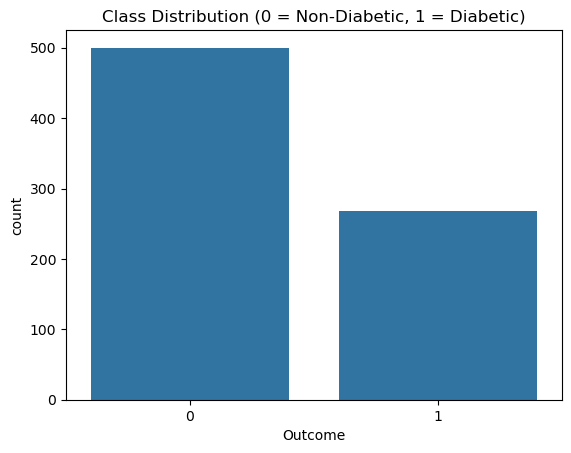

In [10]:
# Exploratory Data Analysis (EDA)

# Class distribution
sns.countplot(x="Outcome", data=df)
plt.title("Class Distribution (0 = Non-Diabetic, 1 = Diabetic)")
plt.show()

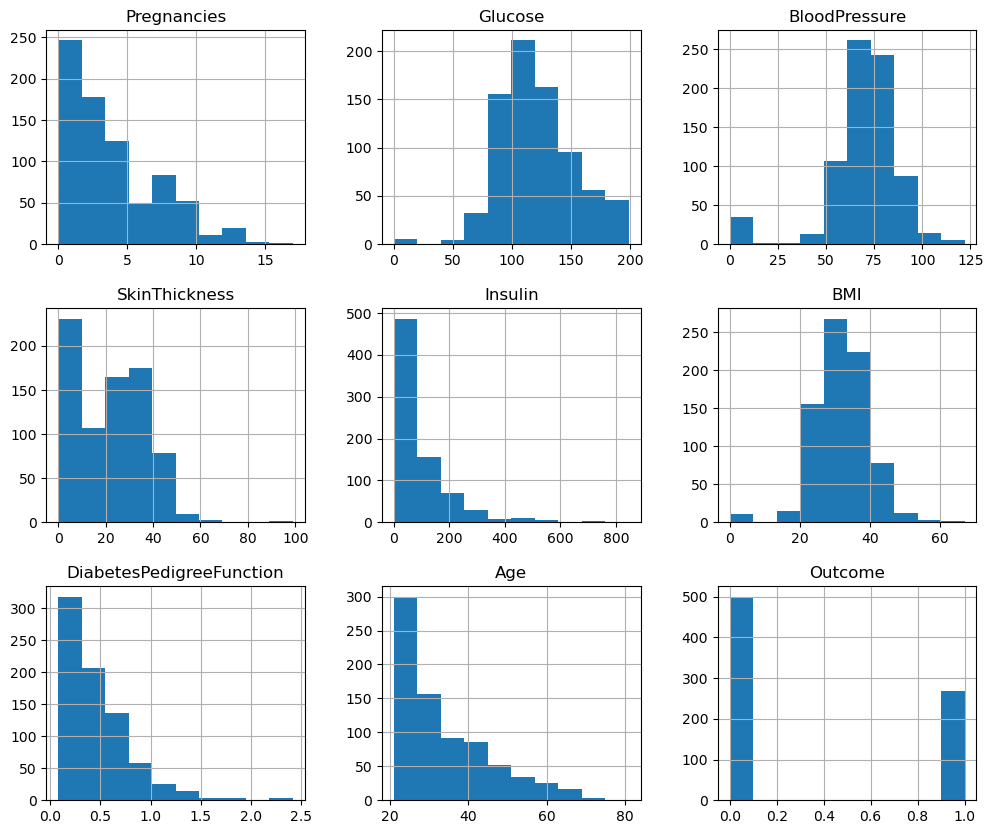

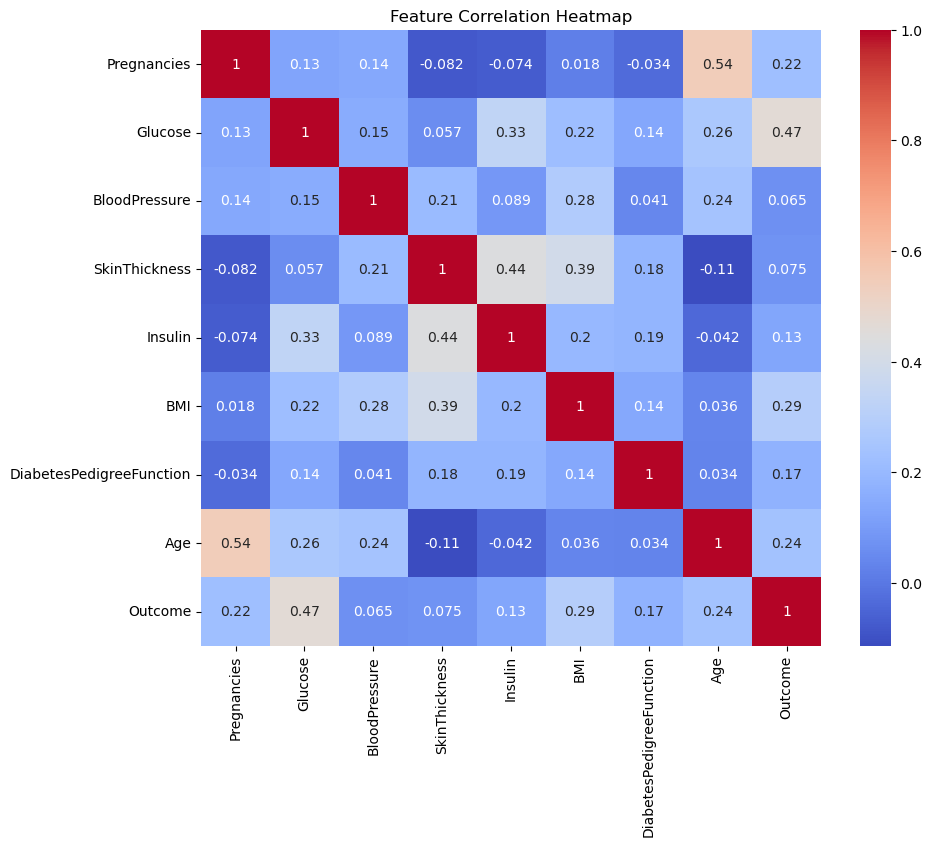

In [11]:
# Feature distributions
df.hist(figsize=(12, 10))
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
# Feature scaling

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Apply SMOTE on the full dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_scaled, y)

In [14]:
print("Data shape after SMOTE:")
print(X_train_smote.shape)

print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

Data shape after SMOTE:
(1000, 8)
Class distribution after SMOTE:
Outcome
1    500
0    500
Name: count, dtype: int64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train_smote, y_train_smote,
    test_size=0.2,
    random_state=42,
    stratify=y_train_smote
)

In [16]:
# Logistic Regression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_smote, y_train_smote)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       100
           1       0.77      0.74      0.76       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [17]:
# Support Vector Machine (SVM)

svm = SVC(kernel="rbf")
svm.fit(X_train_smote, y_train_smote)

y_pred_svm = svm.predict(X_test)

print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       100
           1       0.82      0.87      0.84       100

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [18]:
# Random Forest

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)

y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



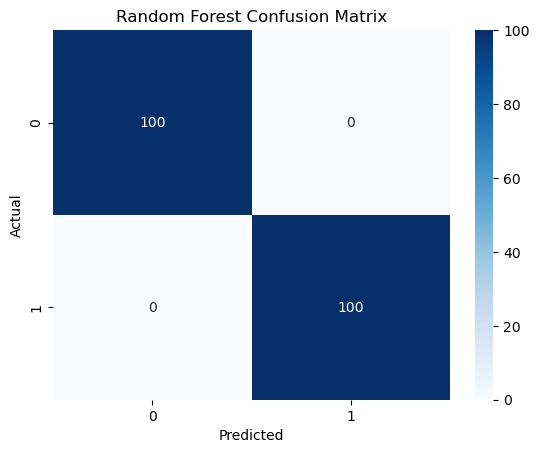

In [19]:
# Confusion matrix (Random Forest)

cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()
